In [167]:
%matplotlib inline

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [169]:
df_test = pd.read_csv ('../data/turnstile/covid/tests-by-zcta.csv')

df_test.head()

,MODZCTA,Positive,Total,zcta_cum.perc_pos
0,NaN,1633,1943,84.05
1,10001.0,314,1047,29.99
2,10002.0,915,2345,39.02
3,10003.0,410,1445,28.37
4,10004.0,28,100,28.00


In [170]:
df_test = df_test.drop([0])
df_test = df_test.rename(columns = {'MODZCTA': 'zipcodes', 'zcta_cum.perc_pos': 'positive_rate'})
df_test['zipcodes'] = df_test['zipcodes'].astype(int)

df_test.head()

,zipcodes,Positive,Total,positive_rate
1,10001,314,1047,29.99
2,10002,915,2345,39.02
3,10003,410,1445,28.37
4,10004,28,100,28.00
5,10005,54,243,22.22


In [171]:
df_income = pd.read_csv ('../data/turnstile/income/income.csv')

df_income.head()

,zipcodes,income
0,10001,88526
1,10002,35959
2,10003,112131
3,10004,157645
4,10005,173333


In [172]:
col_names = ['zipcodes', 'population']

df_population = pd.read_csv ('../data/turnstile/income/nyc_population.csv', names=col_names)

df_population.head()

,zipcodes,population
0,10001,22924
1,10002,74993
2,10003,54682
3,10004,3028
4,10005,8831


In [174]:
df_rideship = pd.read_csv ('../data/turnstile/zip_ridership/0422_res.csv', index_col=0)
df_rideship = df_rideship.rename(columns={'zipcode': 'zipcodes'})
df_rideship.head()

,zipcodes,rideship
0,11693,0.00
1,10463,815.25
2,10033,3751.50
3,11367,0.00
4,10472,4886.75


In [178]:
df_merge = pd.merge(df_test, df_income)
df_merge = pd.merge(df_merge, df_population)
df_merge = pd.merge(df_merge, df_rideship)

df_merge.head()

,zipcodes,Positive,Total,positive_rate,income,population,rideship
0,10001,314,1047,29.99,88526,22924,18213.910606
1,10002,915,2345,39.02,35959,74993,6457.687500
2,10003,410,1445,28.37,112131,54682,9563.500000
3,10004,28,100,28.00,157645,3028,2279.250000
4,10004,28,100,28.00,157645,3028,2279.250000


In [179]:
df_merge['positive%1000'] = 1000 * df_merge['Positive'] / df_merge['population']

df_merge.head()

,zipcodes,Positive,Total,positive_rate,income,population,rideship,positive%1000
0,10001,314,1047,29.99,88526,22924,18213.910606,13.697435
1,10002,915,2345,39.02,35959,74993,6457.687500,12.201139
2,10003,410,1445,28.37,112131,54682,9563.500000,7.497897
3,10004,28,100,28.00,157645,3028,2279.250000,9.247028
4,10004,28,100,28.00,157645,3028,2279.250000,9.247028


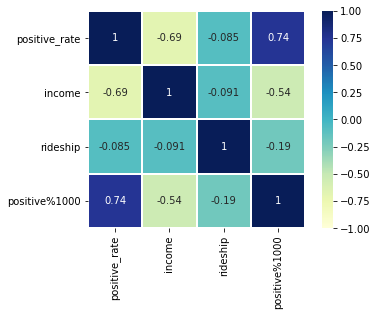

<Figure size 432x288 with 0 Axes>

In [184]:
heat_map = df_merge.drop(['zipcodes', 'Positive', 'Total', 'population'], axis=1)
sns.heatmap(heat_map.corr(), annot = True, linewidth = 1, cmap = 'YlGnBu',square = True, vmin = -1, vmax = 1)
plt.show()
plt.tight_layout()

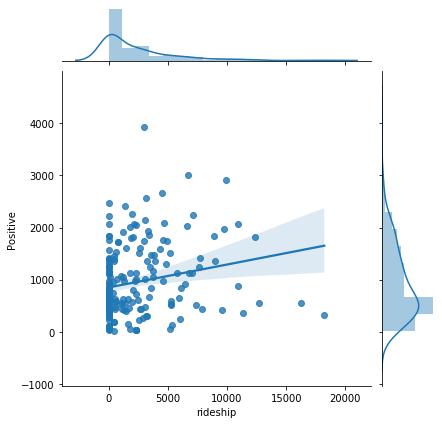

In [183]:
grid = sns.jointplot(x = 'rideship', y  ='Positive', data = df_merge, kind = 'reg')

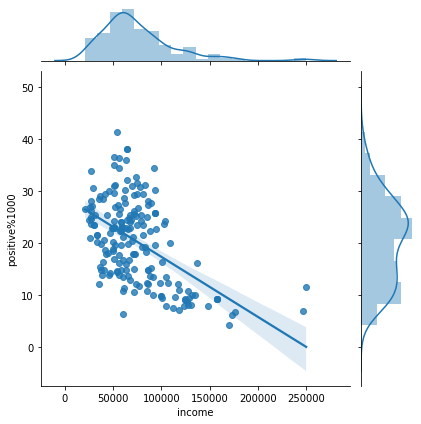

In [185]:
grid = sns.jointplot(x = 'income', y  ='positive%1000', data = df_merge, kind = 'reg')

In [190]:
import folium
from folium.plugins import MarkerCluster

In [191]:
zipcodes = df_merge
zipcodes['zipcodes'] = zipcodes['zipcodes'].astype(str)

zipcodes.head()

,zipcodes,Positive,Total,positive_rate,income,population,rideship,positive%1000
0,10001,314,1047,29.99,88526,22924,18213.910606,13.697435
1,10002,915,2345,39.02,35959,74993,6457.687500,12.201139
2,10003,410,1445,28.37,112131,54682,9563.500000,7.497897
3,10004,28,100,28.00,157645,3028,2279.250000,9.247028
4,10004,28,100,28.00,157645,3028,2279.250000,9.247028


In [193]:
case_map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
geo_path = '../data/turnstile/geo/nyc_zip_code.geojson'

case_map.choropleth(geo_data = geo_path,
             data = zipcodes,
             columns = ['zipcodes', 'Positive'], 
             key_on = 'feature.properties.postalCode', 
             fill_color = 'OrRd', fill_opacity = 0.8, line_opacity = 0.5,  
             legend_name = 'Positive Case by Zip Code')

case_map

In [194]:
case_map.save("../data/turnstile/map_Positive.html")

In [197]:
income_map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)

income_map.choropleth(geo_data = geo_path,
             data = zipcodes,
             columns = ['zipcodes', 'income'], 
             key_on = 'feature.properties.postalCode', 
             fill_color = 'OrRd', fill_opacity = 0.8, line_opacity = 0.5,  
             legend_name = 'Income by Zip Code')
income_map

In [198]:
income_map.save("../data/turnstile/map_income.html")